<a href="https://colab.research.google.com/github/N4877/clean-data/blob/main/ML_Model_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Concept**
In the health insurance industry, pricing accuracy is critical to balancing profitability with customer satisfaction. Insurance companies rely heavily on actuarial data to estimate the financial risk each policyholder represents. Traditionally, premium calculations have been based on static rules and historical trends, but as healthcare costs continue to rise, data-driven models have become essential.

This project aims to leverage machine learning—specifically Linear Regression—to predict individual medical insurance charges based on key demographic and lifestyle factors such as age, body mass index (BMI), smoking status, gender, and number of dependents. By analyzing these variables, the model can provide a more precise estimate of expected healthcare costs, allowing insurers to:

Set personalized premium rates,

Identify high-risk individuals,

Develop targeted health programs and pricing strategies.**

# Data Description


Age:             Age of the primary beneficiary(typically         18  to 64 years).

---
sex :   Gender of the beneficiary(male orfemale).


---
bmi :  Body Mass Index(e.g. weight in kg divided by heigh in meters squared).


---
children :   Number of dependent children covered by healthy insurance.


---

smoker : Whether the person smoker(Yes or No).


---

charges : Medical insurance cost billed to the customer(target variable for prediction).








**Load the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error


In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head()
df.copy()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.copy()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Check the shape of your dataset how many rows and columns are there.

In [4]:
df.shape

(1338, 7)

In [5]:
# Get data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Summerize statistical data

In [6]:
# Summary statistic
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observation:
All the count of observation :1338
Age between 10 and 64and average age 36 years old.
In numbers of childern there are outlier standard deviation bigger than mean, 50% have one child, The max of pepole have five child.
Bmi the big size 53 and small size 15.
Charges between 11121.87 and 63770.42.

In [7]:
# Duplicated data
df.duplicated().sum()

np.int64(1)

Now we remove duplicate

In [8]:
# Drop duplicate
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [9]:
# Check the missing values
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


*This dataset is clean there is no missing values text*

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


UNIVARIATE

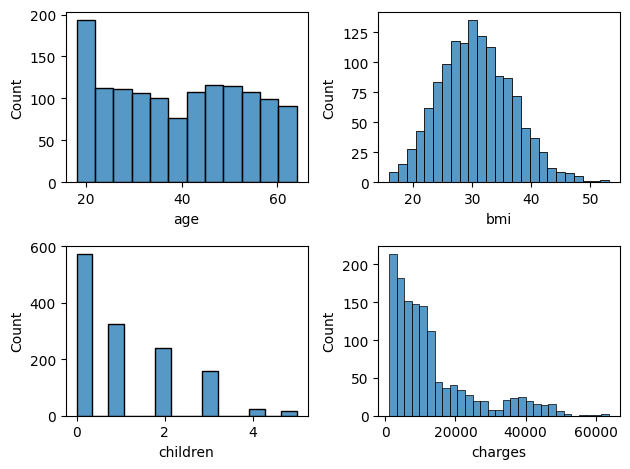

In [11]:
# Choose the feature
features = ['age', 'bmi', 'children', 'charges']
for i, feature in enumerate(features):
  plt.subplot(2, 2, i+1)
  sns.histplot(df[feature])
plt.tight_layout()
plt.show()

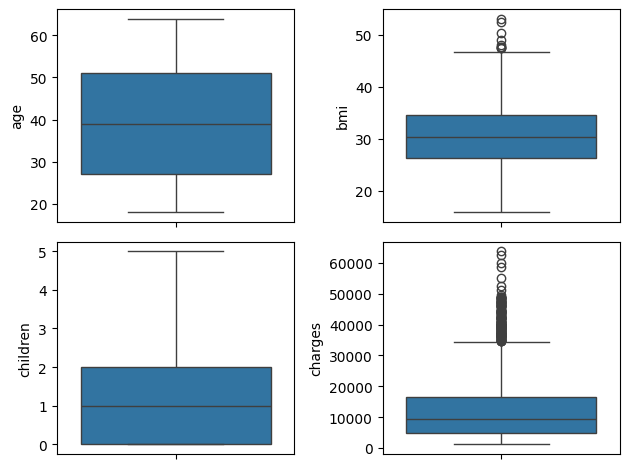

In [12]:
for i, feature in enumerate(features):
  plt.subplot(2, 2, i+1)
  sns.boxplot(df[feature])
plt.tight_layout()
plt.show()

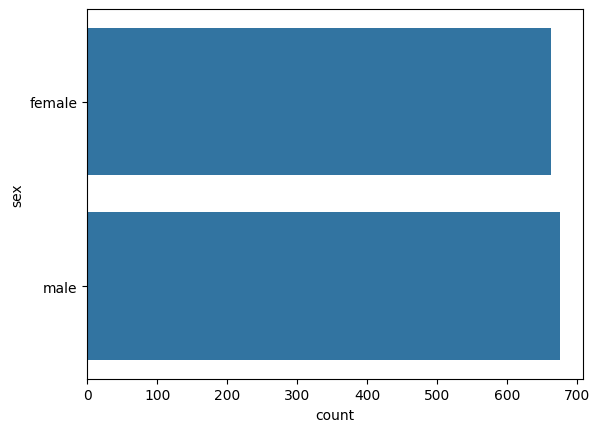

In [13]:
# Explor sex in hirzantal
sns.countplot(df['sex'])
plt.show()

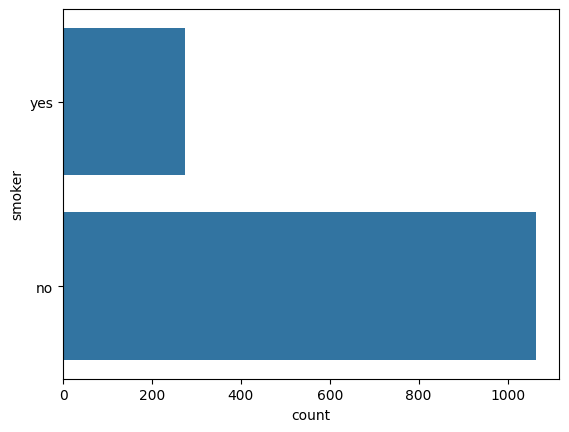

In [14]:
# plot smoker
sns.countplot(df['smoker'])
plt.show()

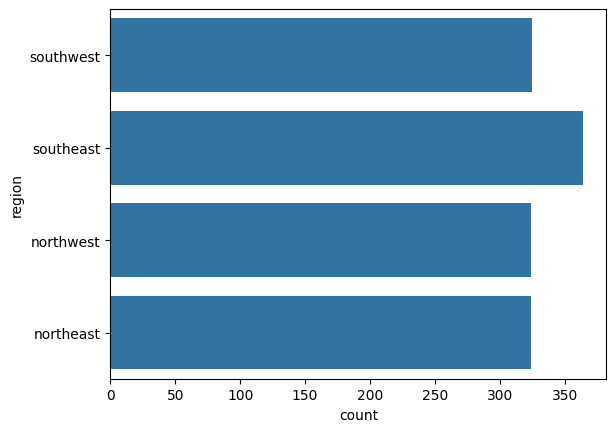

In [15]:
# plot region
sns.countplot(df['region'])
plt.show()

BIVARIATE


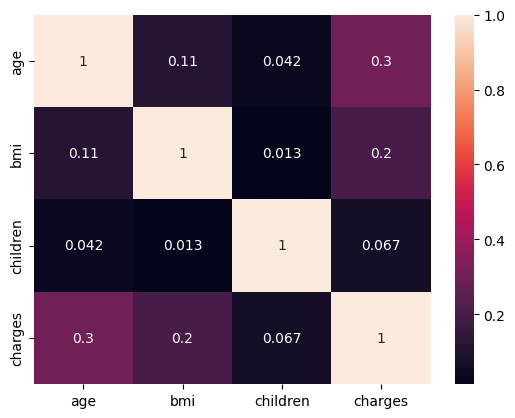

In [52]:
# Correlation between charges and all features
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


** Correlation between charges and age is positive week correlation, between charges and children very week, between charges and bmi also week**

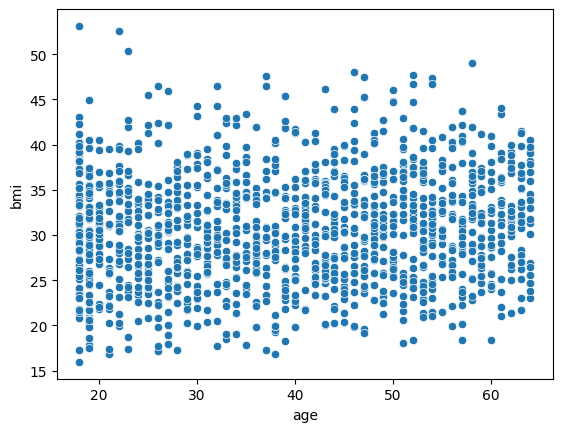

In [17]:
# Plot relationship between age and bmi
sns.scatterplot(x='age', y='bmi', data=df)
plt.show()

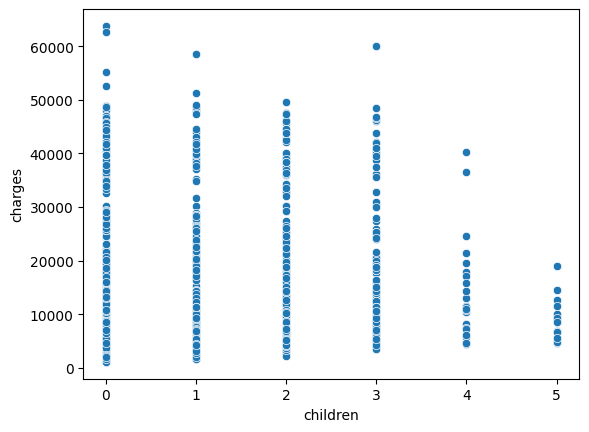

In [18]:
# Relationship between number of children and charges
sns.scatterplot(x='children', y='charges', data=df)
plt.show()

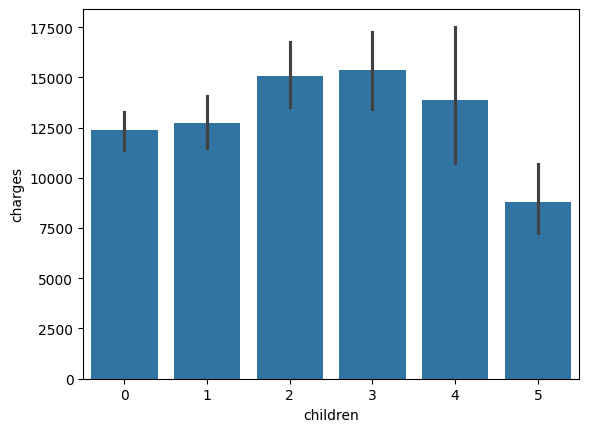

In [19]:
# Plot bar plot
sns.barplot(x='children', y='charges', data=df)
plt.show()

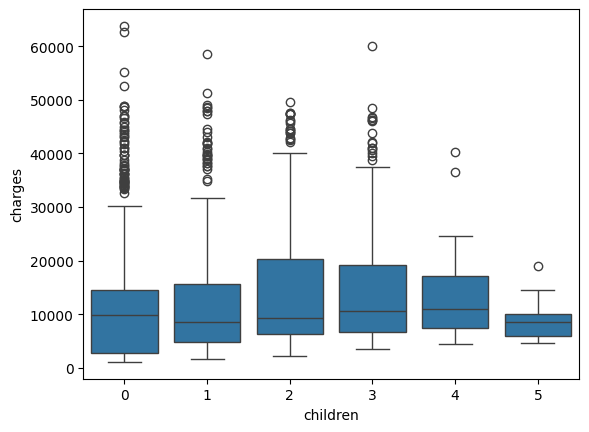

In [20]:
# plot box plot
sns.boxplot(x='children', y='charges', data=df)
plt.show()

**Define Independent and Dependent**

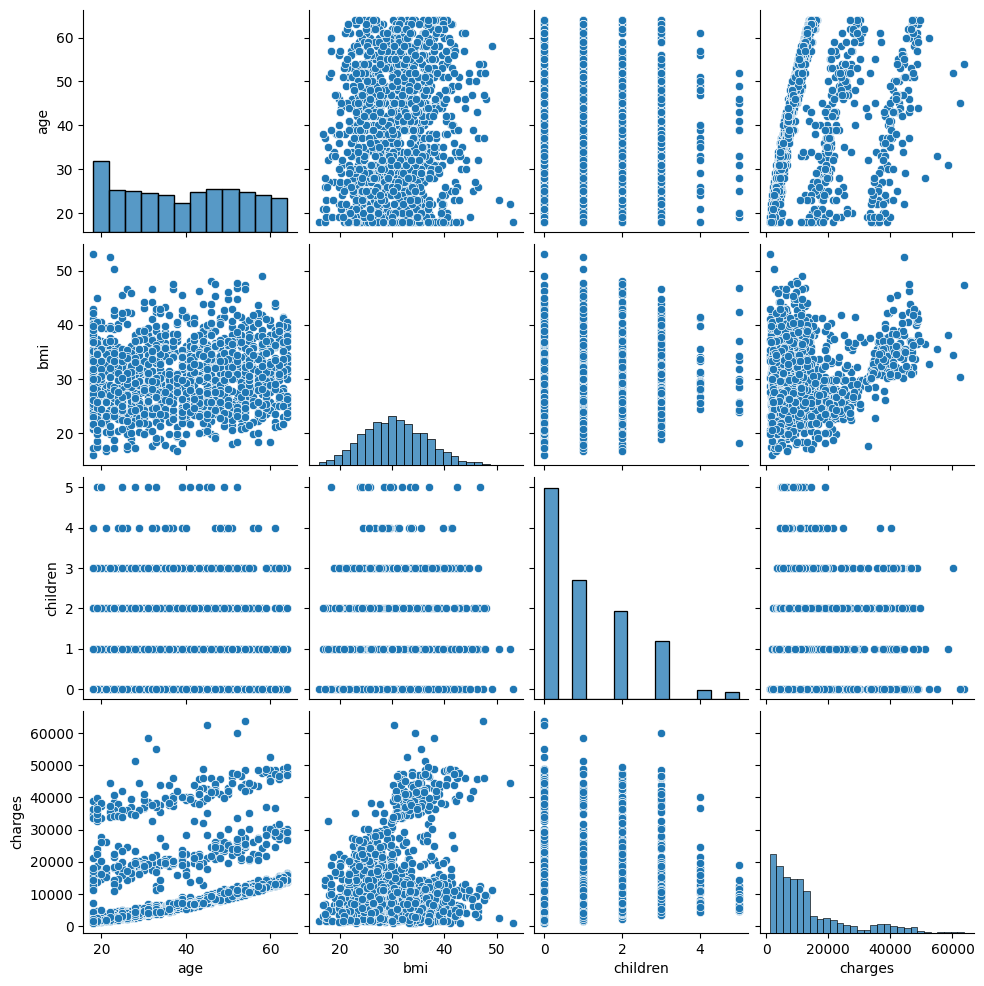

In [21]:
# plot pair
sns.pairplot(df)
plt.show()

**The pairplot show us the age and charges tend to right skewed, also chidreen, bmi get normal distribution **


In [22]:
# Define independent and dependent varaible
X = df.drop('charges', axis=1)
y = df['charges']

In [23]:
# Convert to hot encoding
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

X.astype(float)


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,50.0,30.970,3.0,1.0,0.0,1.0,0.0,0.0
1334,18.0,31.920,0.0,0.0,0.0,0.0,0.0,0.0
1335,18.0,36.850,0.0,0.0,0.0,0.0,1.0,0.0
1336,21.0,25.800,0.0,0.0,0.0,0.0,0.0,1.0


**Splitting data to train and test data**

In [24]:
# Split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Define independent variables**

In [25]:
# Define independent variable
ind_var1 = ['age']

**Bluiding Regression model**

In [74]:
# Create instance
lr1 = LinearRegression()
lr1.fit(X_train[ind_var1], y_train)

LinearRegression()

**Display the Parametars Intercept and Coefficient**

In [78]:
# Print intercept, coef
print("Intercept", lr1.intercept_)
print("Coef", lr1.coef_)

Intercept 3534.0917330710636
Coef [242.2581519]


In [79]:
# Print Linear regression equation
print("charges=", "(", lr1.coef_[0], ")", "*", ind_var1[0], "+", lr1.intercept_ )

charges= ( 242.25815190122503 ) * age + 3534.0917330710636


**charges coef = 242.25**

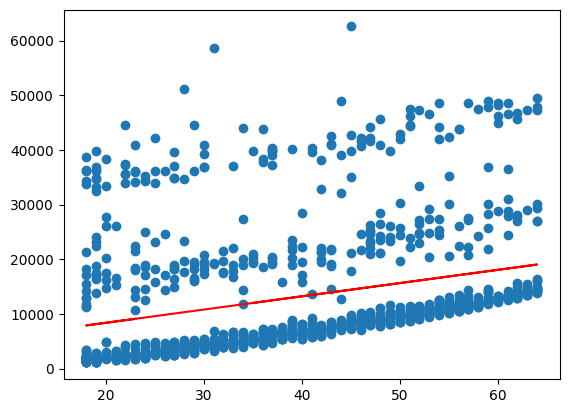

In [80]:
# Plot best fit line
plt.scatter(X_train[ind_var1], y_train)
plt.plot(X_train[ind_var1], lr1.predict(X_train[ind_var1]), color='red')
plt.show()

**Single Linear  Regressin  charges vs age, bmi**

In [30]:
# newfeature
ind_var2 = [ 'bmi']

In [75]:
# Create instance and fitting
lr2 = LinearRegression()
lr2.fit(X_train[ind_var2], y_train)

LinearRegression()

In [81]:
# Print prameters
print("Intercept", lr2.intercept_)
print("Coef", lr2.coef_)

Intercept 2488.571161649981
Coef [345.16978692]


In [76]:
# Print Linear Regression equation
print("charges=", "(", lr2.coef_[0], ")", "*", ind_var2[0], "+", lr2.intercept_)

charges= ( 345.1697869197329 ) * bmi + 2488.571161649981


**Coefficient = 242 not increase**

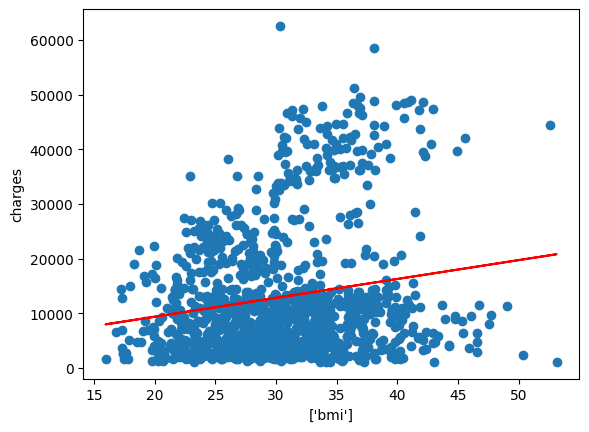

In [82]:
# Plot the best fit line
plt.scatter(X_train[ind_var2], y_train)
plt.plot(X_train[ind_var2], lr2.predict(X_train[ind_var2]), color='red')
plt.xlabel(ind_var2)
plt.ylabel('charges')
plt.show()

**Single Linear Regression charges vs age, bmi, children**

In [35]:
# Train use new feature
ind_var3 = ['children']

In [112]:
# Create instand and fittind the train and test
lr3 = LinearRegression()
lr3.fit(X_train[ind_var3], y_train)

LinearRegression()

In [113]:
# Print parameters
print("Intercept", lr3.intercept_)
print("Coef", lr3.coef_)

Intercept 12114.761168782596
Coef [844.35523067]


**Coefficient = 242**

In [114]:
# Print Linear regression equation
print("charges=", "(", lr3.coef_[0], ")", "*", ind_var3[0], "+", lr3.intercept_)

charges= ( 844.3552306655771 ) * children + 12114.761168782596


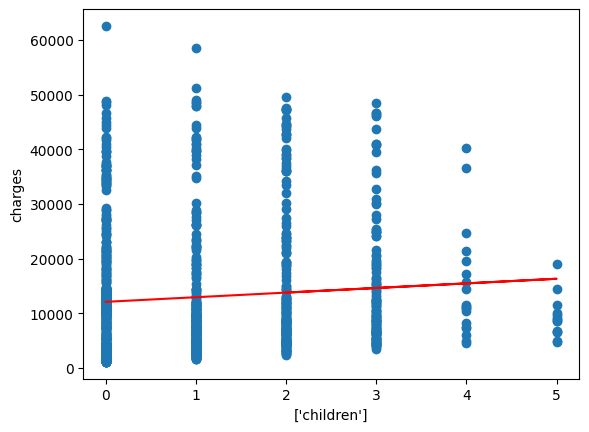

In [115]:
# Plot the best fit line charges vs children
plt.scatter(X_train[ind_var3], y_train)
plt.plot(X_train[ind_var3], lr3.predict(X_train[ind_var3]), color='red')
plt.xlabel(ind_var3)
plt.ylabel('charges')
plt.show()

**We splitting our data agin for catecorical data becuse we convert to dummy**

In [116]:
# Splitting data for dummy data to train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Multiple Linear Regression charges vs age, bmi, children, sex_male and smoker_yes**

In [117]:
# New feature
ind_var4 = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes']

In [118]:
# Create instance and fitting train and test data
lr4 = LinearRegression()
lr4.fit(X_train[ind_var4], y_train)

LinearRegression()

In [119]:
# Print parameters
print("Intercept", lr4.intercept_)
print("Coef", lr4.coef_)

Intercept -11221.05166157083
Coef [  249.09521752   305.59649519   537.9633666    -85.02704092
 23051.36812442]


In [120]:
# Print Linear Regression equation
print("charges=", "(", lr4.coef_[0], ")", "*", ind_var4[0], "+", "(", lr4.coef_[1], ")", "*", ind_var4[1], "+", "(", lr4.coef_[2], ")", "*", ind_var4[2], "+", "(", lr4.coef_[3], ")", "*", ind_var4[3], "+", "(", lr4.coef_[4], ")", "*", ind_var4[4], "+", lr4.intercept_)

charges= ( 249.09521752468697 ) * age + ( 305.5964951924693 ) * bmi + ( 537.9633665994863 ) * children + ( -85.02704091707851 ) * sex_male + ( 23051.368124417007 ) * smoker_yes + -11221.05166157083


**Multiple Linear Regression charges vs age, bmi, children, sex_male, smoker_yes, region_northwest, region_southeast and region southwest**

In [121]:
ind_var5 = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes',  'region_northwest', 'region_southeast', 'region_southwest']

In [122]:
# Createinstance of Linear regression and fitting
lr5 = LinearRegression()
lr5.fit(X_train[ind_var5], y_train)

LinearRegression()

In [123]:
# Print parameters
print("Intercept", lr5.intercept_)
print("Coef", lr5.coef_)

Intercept -11092.65229594595
Coef [  248.21072022   318.70144095   533.0099888   -101.54205399
 23077.76459287  -391.76145478  -838.91961573  -659.13975155]


In [124]:
# Print Linear  regression equation for all feature
print("charges=", "(", lr5.coef_[0], ")", "*", ind_var5[0], "+", "(", lr5.coef_[1], ")", "*", ind_var5[1], "+", "(", lr5.coef_[2], ")", "*", ind_var5[2], "+", "(", lr5.coef_[3], ")", "*", ind_var5[3], "+", "(", lr5.coef_[4], ")", "*", ind_var5[4], "+","(", lr5.coef_[5], ")", "*", ind_var5[5], "+", "(", lr5.coef_[6], ")", "*", ind_var5[6], "+", "(", lr5.coef_[7], ")", "*", ind_var5[7], "+", lr5.intercept_)


charges= ( 248.21072022470446 ) * age + ( 318.70144095235077 ) * bmi + ( 533.009988798697 ) * children + ( -101.54205399029631 ) * sex_male + ( 23077.764592868083 ) * smoker_yes + ( -391.7614547836092 ) * region_northwest + ( -838.9196157269652 ) * region_southeast + ( -659.1397515529586 ) * region_southwest + -11092.65229594595


**Coefficient not gives real number of change so we use Metrics to evaluate our model**

**Model Performance Evaluate**

**Define multiple function to compute perfornace function such as MAPE, MAE, R-squared Adjust-R_squared**

In [125]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regression model
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    r2 = r2_score(target, pred)  # to compute R-squared
    adj_r2 = adj_r2_score(predictors, target, pred)  # to compute Adjusted R-squared

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adj_r2,
        },
        index=[0],
    )

    return df_perf

In [126]:
# Performance train data
lin_reg_mod_perf_train1 = model_performance_regression(model=lr1, predictors=X_train[ind_var1], target=y_train)
lin_reg_mod_perf_train1

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,11199.316609,8767.959266,113.817976,0.083921,0.083062


**Note R-squared andAdj R-squared are closed in train model**

In [127]:
# Performance test data
lin_reg_mod_perf_test1 = model_performance_regression(model=lr1, predictors=X_test[ind_var1], target=y_test)
lin_reg_mod_perf_test1

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,12894.779883,9657.78935,113.844775,0.09513,0.091728


**Note R-squared 0.09 and Adj R-squared 0.09  are closed our model generalization week in unseen data week**

In [128]:
# Performance midel1 train data
lin_reg_mod_perf_train2 = model_performance_regression(model=lr2, predictors=X_train[ind_var2], target=y_train)
lin_reg_mod_perf_train2

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,11513.261713,8873.708364,146.195745,0.031841,0.030933


In [129]:
# Performance model1 test data
lin_reg_mod_perf_test2 = model_performance_regression(model=lr2, predictors=X_test[ind_var2], target=y_test)
lin_reg_mod_perf_test2

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,13200.443952,9891.123029,153.738549,0.051723,0.048158


**Still very week**

In [130]:
# Performance model3 train data
lin_reg_mod_perf_train3 = model_performance_regression(model=lr3, predictors=X_train[ind_var3], target=y_train)
lin_reg_mod_perf_train3

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,11657.529949,8793.952128,143.123417,0.007426,0.006495


In [131]:
# Performance model3 test data
lin_reg_mod_perf_test3 = model_performance_regression(model=lr3, predictors=X_test[ind_var3], target=y_test)
lin_reg_mod_perf_test3

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,13645.970308,9960.360851,148.253158,-0.013368,-0.017178


**This model R-squared nagitve not generalizition very well**

In [132]:
# Performance model4 train data
lin_reg_mod_perf_train4 = model_performance_regression(model=lr4, predictors=X_train[ind_var4], target=y_train)
lin_reg_mod_perf_train4

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,6088.719666,4187.484238,42.124209,0.729229,0.727955


In [133]:
# Performance model4 test data
lin_reg_mod_perf_test4 = model_performance_regression(model=lr4, predictors=X_test[ind_var4], target=y_test)
lin_reg_mod_perf_test4

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,5991.820601,4198.1118,42.003014,0.804622,0.800893


In [134]:
# Performance model5 train data
lin_reg_mod_perf_train5 = model_performance_regression(model=lr5, predictors=X_train[ind_var5], target=y_train)
lin_reg_mod_perf_train5

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,6081.106882,4181.901538,41.920915,0.729906,0.727867


In [135]:
# Performance model5 test data
lin_reg_mod_perf_test5 = model_performance_regression(model=lr5, predictors=X_test[ind_var5], target=y_test)
lin_reg_mod_perf_test5

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,5956.342894,4177.045561,41.396756,0.806929,0.800965


**This last model  is work well in train and test dtata**

**Model Performance Comparison**

**Training Performance Comparision**


In [136]:
# Concatenating the training performance DataFrame
df_perf_train = pd.concat([lin_reg_mod_perf_train1, lin_reg_mod_perf_train2, lin_reg_mod_perf_train3, lin_reg_mod_perf_train4, lin_reg_mod_perf_train5], axis=0)
df_perf_train.index = ["lin_reg1", "lin_reg2", "lin_reg3", "lin_reg4", "lin_reg5"]
df_perf_train

,RMSE,MAE,MAPE,R-squared,Adj R-squared
lin_reg1,11199.316609,8767.959266,113.817976,0.083921,0.083062
lin_reg2,11513.261713,8873.708364,146.195745,0.031841,0.030933
lin_reg3,11657.529949,8793.952128,143.123417,0.007426,0.006495
lin_reg4,6088.719666,4187.484238,42.124209,0.729229,0.727955
lin_reg5,6081.106882,4181.901538,41.920915,0.729906,0.727867


In [137]:
# Concatenating the testing performance DataFrame
df_perf_test = pd.concat([lin_reg_mod_perf_test1, lin_reg_mod_perf_test2, lin_reg_mod_perf_test3, lin_reg_mod_perf_test4, lin_reg_mod_perf_test5], axis=0)
df_perf_test.index = ["lin_reg1", "lin_reg2", "lin_reg3", "lin_reg4", "lin_reg5"]
df_perf_test

,RMSE,MAE,MAPE,R-squared,Adj R-squared
lin_reg1,12894.779883,9657.789350,113.844775,0.095130,0.091728
lin_reg2,13200.443952,9891.123029,153.738549,0.051723,0.048158
lin_reg3,13645.970308,9960.360851,148.253158,-0.013368,-0.017178
lin_reg4,5991.820601,4198.111800,42.003014,0.804622,0.800893
lin_reg5,5956.342894,4177.045561,41.396756,0.806929,0.800965


**There is not found overfitting R-Squares ~0.80 our modelis fitting very well**


In [139]:
# Use cross-validation to get more reliable estimate
from sklearn.model_selection import cross_val_score
model = LinearRegression()
score = cross_val_score(model, X, y, cv=5)
print( "Cross-validated R**2 score:",score)
print( "Average R**2",score.mean())

Cross-validated R**2 score: [0.76148609 0.70651382 0.77741544 0.73269494 0.7555821 ]
Average R**2 0.7467384760760104


**Compare with baseline Model**

In [144]:
# Compare the model with dummyregressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)
r2_dummy = r2_score(y_test, y_dummy_pred)
print("Dummy R-squared:", r2_dummy)
print("Linear Regression R-squared:", lin_reg_mod_perf_test5["R-squared"].values[0])


Dummy R-squared: -0.008391982350864469
Linear Regression R-squared: 0.8069287081198011


**Check Feture Importance for linear regression: coefficients**

In [143]:
model.fit(X_train, y_train)
impportances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
impportances = impportances.sort_values(by='Importance', ascending=False)
impportances

,Attribute,Importance
4,smoker_yes,23077.764593
2,children,533.009989
1,bmi,318.701441
0,age,248.210720
3,sex_male,-101.542054
5,region_northwest,-391.761455
7,region_southwest,-659.139752
6,region_southeast,-838.919616


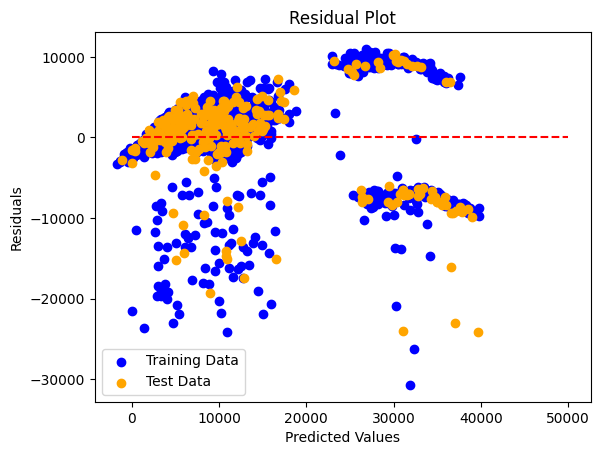

In [145]:
# Plot residuals
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='blue', marker='o', label='Training Data')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='orange', marker='o', label='Test Data')
plt.hlines(y=0, xmin=0, xmax=50000, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()